In [34]:
import pandas as pd
import numpy as np
import datetime

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
pd.set_option('display.max_rows', 10)


In [35]:
merged1 = pd.read_csv('new_data/merged_clean.csv', index_col=0)
print(merged1.shape)
merged2 = pd.read_csv('new_data/merged_clean_2.csv', index_col=0)
print(merged2.shape)
merged3 = pd.read_csv('new_data/merged_clean_tdf2022.csv', index_col=0)
print(merged3.shape)
merged4 = pd.read_csv('new_data/merged_clean_10s.csv', index_col=0)
print(merged4.shape)
merged = merged1.append(merged2)
print(merged.shape)

(271100, 21)
(207447, 21)
(9345, 25)
(240395, 21)
(478547, 21)


/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_84202/2192585917.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged = merged1.append(merged2)


In [36]:
merged = pd.concat([merged, merged3, merged4], ignore_index=True)
merged.shape

(728287, 25)

In [37]:
#drop duplicates
merged.drop_duplicates(inplace=True)

#drop all na
merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'Distance:'], how='all', inplace=True)
#merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'Distance:'], how='all', inplace=True)
merged.reset_index(inplace=True, drop=True)
merged.shape

(599496, 25)

In [7]:
merged.columns

Index(['name', 'year', 'type', 'date', 'result', 'gc', 'icon', 'race_ref',
       'race_name', 'race_detail', 'race_rank', 'distance', 'points',
       'Avg. speed winner:', 'Distance:', 'Parcours type:', 'ProfileScore:',
       'Vert. meters:', 'Startlist quality score:', 'Won how: ',
       'adjusted_points', 'Race category:', 'Points scale:', 'Arrival:',
       'Won how:'],
      dtype='object')

In [38]:
#set date as datetime
merged['date'] = pd.to_datetime(merged['date'])

### Vertical meters

In [39]:
no_na = merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'distance'], how='any')

In [40]:
# profile score via vert and distance
X  = no_na[['Distance:', 'ProfileScore:']]
y = no_na['Vert. meters:']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeRegressor()

tree.fit(X_train_scaled, y_train)

tree.score(X_test_scaled, y_test)

0.9995663755364569

In [41]:
vert_na = merged[merged['Vert. meters:'].isna()]
vert_na.dropna(subset=['Distance:', 'ProfileScore:'], how='any', inplace=True)

X_pred = vert_na[['Distance:', 'ProfileScore:']]

X_pred_scaled = scaler.transform(X_pred)

vert_na['predicted_vert'] = tree.predict(X_pred_scaled)
vert_na

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_84202/1125638154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vert_na.dropna(subset=['Distance:', 'ProfileScore:'], how='any', inplace=True)
/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_84202/1125638154.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vert_na['predicted_vert'] = tree.predict(X_pred_scaled)


,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points,Race category:,Points scale:,Arrival:,Won how:,predicted_vert
5605,richard-carapaz,2020,etappe,2020-08-09,0,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,45.0,NaN,663.0,Sprint of large group,0.0,NaN,NaN,NaN,NaN,1346.0
5606,luke-rowe,2020,etappe,2020-08-09,109,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,45.0,NaN,663.0,Sprint of large group,0.0,NaN,NaN,NaN,NaN,1346.0
5607,maximilian-schachmann,2020,etappe,2020-08-09,24,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,45.0,NaN,663.0,Sprint of large group,0.0,NaN,NaN,NaN,NaN,1346.0
5608,dries-devenyns,2020,etappe,2020-08-09,77,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,45.0,NaN,663.0,Sprint of large group,0.0,NaN,NaN,NaN,NaN,1346.0
5609,rudy-molard,2020,etappe,2020-08-09,50,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,45.0,NaN,663.0,Sprint of large group,0.0,NaN,NaN,NaN,NaN,1346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280443,ivan-basso,2013,etappe,2013-04-19,17,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,329.0,NaN,420.0,? - let us know!,1105440.0,NaN,NaN,NaN,NaN,4189.0
280444,leopold-konig,2013,etappe,2013-04-19,20,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,329.0,NaN,420.0,? - let us know!,276360.0,NaN,NaN,NaN,NaN,4189.0
280445,jan-barta,2013,etappe,2013-04-19,58,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,329.0,NaN,420.0,? - let us know!,0.0,NaN,NaN,NaN,NaN,4189.0
280446,david-de-la-cruz,2013,etappe,2013-04-19,24,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,329.0,NaN,420.0,? - let us know!,0.0,NaN,NaN,NaN,NaN,4189.0


In [42]:
merged.loc[vert_na.index, 'Vert. meters:'] = vert_na['predicted_vert']

### Decision tree for profile score

In [43]:
#drop where either profile score or vert meters are missing
no_na = merged.dropna(subset=['ProfileScore:', 'Vert. meters:'], how='any')
print(no_na.shape)

#drop where score below 10 -> arbitrary point
no_na = no_na[no_na['ProfileScore:'] > 10]
print(no_na.shape)

(332114, 25)
(282733, 25)


In [44]:
# profile score via vert and distance
X  = no_na[['Distance:', 'Vert. meters:']]
y = no_na['ProfileScore:']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeRegressor()

tree.fit(X_train_scaled, y_train)

tree.score(X_test_scaled, y_test)

0.9999266997428287

In [45]:
profile_na = merged[merged['ProfileScore:'].isna()]
smaller_ten = merged[merged['ProfileScore:'] <= 10]
impute_profile = profile_na.append(smaller_ten)
impute_profile.dropna(subset=['Distance:', 'Vert. meters:'], how='any', inplace=True)

X_pred = impute_profile[['Distance:', 'Vert. meters:']]

X_pred_scaled = scaler.transform(X_pred)

impute_profile['predicted_score'] = tree.predict(X_pred_scaled)
impute_profile

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_84202/821046524.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  impute_profile = profile_na.append(smaller_ten)


,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points,Race category:,Points scale:,Arrival:,Won how:,predicted_score
3648,egan-bernal,2020,etappe,2020-08-01,6,8.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,NaN,2346.0,496.0,? - let us know!,NaN,NaN,NaN,NaN,NaN,49.0
3649,andrey-amador,2020,etappe,2020-08-01,77,77.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,NaN,2346.0,496.0,? - let us know!,NaN,NaN,NaN,NaN,NaN,49.0
3650,jonathan-castroviejo,2020,etappe,2020-08-01,75,75.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,NaN,2346.0,496.0,? - let us know!,NaN,NaN,NaN,NaN,NaN,49.0
3651,pavel-sivakov,2020,etappe,2020-08-01,40,41.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,NaN,2346.0,496.0,? - let us know!,NaN,NaN,NaN,NaN,NaN,49.0
3652,dylan-van-baarle,2020,etappe,2020-08-01,81,81.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,NaN,2346.0,496.0,? - let us know!,NaN,NaN,NaN,NaN,NaN,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585597,allan-davis,2009,etappe,2009-08-29,56,56.0,chrono,race/vuelta-a-espana/2009/stage-1,vuelta-a-espana,Prologue - Assen › Assen,...,0.0,13.0,1264.0,Time Trial,0.0,NaN,NaN,NaN,NaN,13.0
585598,christophe-brandt,2009,etappe,2009-08-29,144,144.0,chrono,race/vuelta-a-espana/2009/stage-1,vuelta-a-espana,Prologue - Assen › Assen,...,0.0,13.0,1264.0,Time Trial,0.0,NaN,NaN,NaN,NaN,13.0
585599,francis-de-greef,2009,etappe,2009-08-29,98,98.0,chrono,race/vuelta-a-espana/2009/stage-1,vuelta-a-espana,Prologue - Assen › Assen,...,0.0,13.0,1264.0,Time Trial,0.0,NaN,NaN,NaN,NaN,13.0
585600,philippe-gilbert,2009,etappe,2009-08-29,14,14.0,chrono,race/vuelta-a-espana/2009/stage-1,vuelta-a-espana,Prologue - Assen › Assen,...,0.0,13.0,1264.0,Time Trial,0.0,NaN,NaN,NaN,NaN,13.0


In [46]:
merged.loc[impute_profile.index, 'ProfileScore:'] = impute_profile['predicted_score']

### KNN to impute parcours type

In [47]:
merged['Parcours type:'].value_counts()

p0    206255
p2    120871
p1    113676
p5     71699
p3     50752
p4     36243
Name: Parcours type:, dtype: int64

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)

px0 = merged[merged['Parcours type:']!='p0']

px0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)

X = px0[['ProfileScore:', 'Vert. meters:']]

y = px0['Parcours type:']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)

knn.score(X_test_scaled, y_test)


/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_84202/977234109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  px0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)


0.9937150471633773

In [49]:
p0 = merged[merged['Parcours type:']=='p0']

p0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)

X_pred = p0[['ProfileScore:', 'Vert. meters:']]

X_pred_scaled = scaler.transform(X_pred)

labels = knn.predict(X_pred_scaled)

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_84202/1480808305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)


In [50]:
p0['adjusted parcours type'] = labels

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_84202/2894937052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p0['adjusted parcours type'] = labels


In [51]:
p0['adjusted parcours type'].value_counts()

p2    6812
p3    3726
p1    3282
p4    2075
p5    1560
Name: adjusted parcours type, dtype: int64

In [52]:
merged.loc[p0.index, 'Parcours type:'] = p0['adjusted parcours type']

In [53]:
merged['Parcours type:'].value_counts()

p0    188800
p2    127683
p1    116958
p5     73259
p3     54478
p4     38318
Name: Parcours type:, dtype: int64

In [54]:
merged.groupby('Parcours type:')[['Vert. meters:', 'ProfileScore:']].mean()

,Vert. meters:,ProfileScore:
Parcours type:,,
p0,NaN,NaN
p1,835.039453,24.972316
p2,2157.736020,83.986160
p3,2347.222029,107.639525
p4,3374.510427,182.416482
p5,3621.362850,282.680996


In [55]:
parcours = {
    'p1' : 'fl',
    'p2' : 'hi_fl',
    'p3' : 'hi_hi',
    'p4' : 'mo_fl',
    'p5' : 'mo_mo'
}

merged['Parcours type:'] = merged['Parcours type:'].map(parcours)

In [56]:
parcours_num = {
    'fl':1,
    'hi_fl':2,
    'hi_hi':3,
    'mo_fl':4,
    'mo_mo':5
}

merged['parcours_type_num'] = merged['Parcours type:'].map(parcours_num)

In [57]:
merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'distance'], how='any', inplace=True)
merged.shape

(335140, 26)

In [58]:
merged.tail()

,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points,Race category:,Points scale:,Arrival:,Won how:,parcours_type_num
591333,olivier-kaisen,2009,etappe,2009-03-15,101,NaN,chrono,race/tirreno-adriatico/2009/stage-5,tirreno-adriatico,Stage 5 (ITT) - Loreto › Macerata,...,48.0,541.0,1209.0,Time Trial,0.0,NaN,NaN,NaN,NaN,2.0
591334,edvald-boasson-hagen,2009,etappe,2009-03-15,8,NaN,chrono,race/tirreno-adriatico/2009/stage-5,tirreno-adriatico,Stage 5 (ITT) - Loreto › Macerata,...,48.0,541.0,1209.0,Time Trial,1508832.0,NaN,NaN,NaN,NaN,2.0
591335,thomas-lofkvist,2009,etappe,2009-03-15,3,NaN,chrono,race/tirreno-adriatico/2009/stage-5,tirreno-adriatico,Stage 5 (ITT) - Loreto › Macerata,...,48.0,541.0,1209.0,Time Trial,2321280.0,NaN,NaN,NaN,NaN,2.0
591336,kanstantsin-siutsou,2009,etappe,2009-03-15,14,NaN,chrono,race/tirreno-adriatico/2009/stage-5,tirreno-adriatico,Stage 5 (ITT) - Loreto › Macerata,...,48.0,541.0,1209.0,Time Trial,812448.0,NaN,NaN,NaN,NaN,2.0
591337,pavel-brutt,2009,etappe,2009-03-15,67,NaN,chrono,race/tirreno-adriatico/2009/stage-5,tirreno-adriatico,Stage 5 (ITT) - Loreto › Macerata,...,48.0,541.0,1209.0,Time Trial,0.0,NaN,NaN,NaN,NaN,2.0


In [59]:
merged.to_csv('merged_treated_2000.csv')

In [33]:
merged[(merged['race_name'] == 'tour-de-france') & (merged['year'] == 2022)& (merged['name'] == 'adam-yates')].sort_values(by='parcours_type_num')

,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points,Race category:,Points scale:,Arrival:,Won how:,parcours_type_num
251179,adam-yates,2022,etappe,2022-07-03,48,8.0,stage,race/tour-de-france/2022/stage-3,tour-de-france,Stage 3 - Vejle › Sønderborg,...,16.0,1280.0,1550.0,Sprint of large group,0.0,NaN,NaN,NaN,NaN,1.0
388708,adam-yates,2022,etappe,2022-07-24,34,NaN,stage,race/tour-de-france/2022/stage-21,tour-de-france,Stage 21 - Paris La Défense › Paris (Champs-Él...,...,13.0,748.0,1550.0,Sprint of large group,0.0,NaN,NaN,NaN,NaN,1.0
251531,adam-yates,2022,etappe,2022-07-01,13,13.0,chrono,race/tour-de-france/2022/stage-1,tour-de-france,Stage 1 (ITT) - Copenhagen › Copenhagen,...,13.0,21.0,1550.0,Time Trial,0.0,NaN,NaN,NaN,NaN,1.0
251355,adam-yates,2022,etappe,2022-07-02,20,12.0,stage,race/tour-de-france/2022/stage-2,tour-de-france,Stage 2 - Roskilde › Nyborg,...,11.0,1149.0,1550.0,Sprint of large group,34100.0,NaN,NaN,NaN,NaN,1.0
251003,adam-yates,2022,etappe,2022-07-05,80,8.0,stage,race/tour-de-france/2022/stage-4,tour-de-france,Stage 4 - Dunkerque › Calais,...,63.0,1785.0,1550.0,11.6 km solo,0.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249975,adam-yates,2022,etappe,2022-07-12,24,5.0,stage,race/tour-de-france/2022/stage-10,tour-de-france,Stage 10 - Morzine › Megève,...,143.0,2733.0,1550.0,Sprint of small group,0.0,NaN,NaN,NaN,NaN,5.0
249813,adam-yates,2022,etappe,2022-07-13,6,6.0,stage,race/tour-de-france/2022/stage-11,tour-de-france,Stage 11 - Albertville › Col du Granon,...,400.0,4070.0,1550.0,3.9 km solo,18600000.0,NaN,NaN,NaN,NaN,5.0
249654,adam-yates,2022,etappe,2022-07-14,12,5.0,stage,race/tour-de-france/2022/stage-12,tour-de-france,Stage 12 - Briançon › L'Alpe d'Huez,...,389.0,4660.0,1550.0,11 km solo,10853100.0,NaN,NaN,NaN,NaN,5.0
389126,adam-yates,2022,etappe,2022-07-21,14,10.0,stage,race/tour-de-france/2022/stage-18,tour-de-france,Stage 18 - Lourdes › Hautacam,...,408.0,4036.0,1550.0,3.6 km solo,8853600.0,NaN,NaN,NaN,NaN,5.0


In [94]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

minmax.fit(merged[['distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']])

merged[['distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']] = minmax.transform(merged[['distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']])

### Test split data

In [310]:
vuelta_riders = merged[(merged['race_name']=='tour-de-france')| (merged['race_name']=='vuelta-a-espana')| (merged['race_name']=='giro-d-italia')][['name', 'year', 'race_name']]
vuelta_riders = vuelta_riders[vuelta_riders['year'] != 2022].drop_duplicates().reset_index(drop=True)
vuelta_riders = vuelta_riders.values
vuelta_riders

array([['egan-bernal', 2020, 'tour-de-france'],
       ['andrey-amador', 2020, 'tour-de-france'],
       ['richard-carapaz', 2020, 'tour-de-france'],
       ...,
       ['ben-swift', 2010, 'vuelta-a-espana'],
       ['mickael-buffaz', 2010, 'vuelta-a-espana'],
       ['arkaitz-duran', 2010, 'vuelta-a-espana']], dtype=object)

In [333]:
def get_sequence(df, name, year, tour, weeks=52):
    
    #get tour data
    if year != 2010:
        tour_data = df[(df['name'] == name) & (df['year'] == year) & (df['race_name'] == tour)].sort_values(by='date')
        y = tour_data[['date', 'points']].set_index('date')
        X_decoder = tour_data[['date', 'distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']].set_index('date')
        
        season_data = df[(df['name'] == name) & (df['date'] < min(tour_data['date'])) & (df['date'] >= min(tour_data['date']) - datetime.timedelta(weeks=weeks))].sort_values(by='date')
        X_encoder = season_data[['date', 'points', 'distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']].set_index('date')
        
    return X_encoder, X_decoder, y

In [202]:
def get_sequences_2(df, name, year, tour):
    
    #get tour data
    predict_data_filter = df[(df['name'] == name) & (df['year'] == year) & (df['race_name'] == tour)]
    train_data_filter = df[(df['name'] == name) & (df['date'] < min(predict_data_filter['date'])) & (df['date'] >= min(predict_data_filter['date']) - datetime.timedelta(weeks=52))]
    merged = pd.concat([predict_data_filter, train_data_filter]).sort_values(by='date')

    X =  merged[['date', 'distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']].set_index('date')
    y = merged[['date', 'points']].set_index('date')
    
    return X, y

In [354]:
from keras.preprocessing.sequence import pad_sequences

def get_sequences(maxlen):
    
    X_encoder_ls = []
    X_decoder_ls = []
    y_ls = []

    for rider, year, tour in vuelta_riders:
        
        if year != 2010:
            
            X_encoder, X_decoder, y = get_sequence(merged, rider, year, tour)
            
            X_encoder = pad_sequences(X_encoder.to_numpy().T, maxlen=maxlen, dtype='float', padding='pre', value=-1000.).T
            X_decoder = pad_sequences(X_decoder.to_numpy().T, maxlen=21, dtype='float', padding='post', value=-1000.).T
            X_decoder = pad_sequences(X_decoder.T, maxlen=maxlen, dtype='float', padding='pre', value=-1000.).T
            
            y = pad_sequences(y.to_numpy().T, maxlen=21, dtype='float', padding='post', value=-1000.).T
            y = pad_sequences(y.T, maxlen=maxlen, dtype='float', padding='pre', value=-1000.).T
                
            X_encoder_ls.append(X_encoder)
            X_decoder_ls.append(X_decoder)
            y_ls.append(y)
            
            print(rider, year, X_encoder.shape, X_decoder.shape, y.shape)
    
    return np.array(X_encoder_ls), np.array(X_decoder_ls), np.array(y_ls)


In [366]:
df_riders = pd.DataFrame(vuelta_riders, columns=['rider', 'year', 'tour'])
df_riders['key'] = df_riders['rider'] +  '-' + df_riders['year'].astype('str')+  '-' + df_riders['tour']
df_riders.to_csv('new_data/df_riders.csv')
df_riders.head()

,rider,year,tour,key
0,egan-bernal,2020,tour-de-france,egan-bernal-2020-tour-de-france
1,andrey-amador,2020,tour-de-france,andrey-amador-2020-tour-de-france
2,richard-carapaz,2020,tour-de-france,richard-carapaz-2020-tour-de-france
3,jonathan-castroviejo,2020,tour-de-france,jonathan-castroviejo-2020-tour-de-france
4,michal-kwiatkowski,2020,tour-de-france,michal-kwiatkowski-2020-tour-de-france


In [357]:
X_encoder_ls, X_decoder_ls, y_ls = get_sequences(70)

egan-bernal 2020 (70, 5) (70, 4) (70, 1)
andrey-amador 2020 (70, 5) (70, 4) (70, 1)
richard-carapaz 2020 (70, 5) (70, 4) (70, 1)
jonathan-castroviejo 2020 (70, 5) (70, 4) (70, 1)
michal-kwiatkowski 2020 (70, 5) (70, 4) (70, 1)
luke-rowe 2020 (70, 5) (70, 4) (70, 1)
pavel-sivakov 2020 (70, 5) (70, 4) (70, 1)
dylan-van-baarle 2020 (70, 5) (70, 4) (70, 1)
primoz-roglic 2020 (70, 5) (70, 4) (70, 1)
george-bennett 2020 (70, 5) (70, 4) (70, 1)
amund-grondahl-jansen 2020 (70, 5) (70, 4) (70, 1)
tom-dumoulin 2020 (70, 5) (70, 4) (70, 1)
robert-gesink 2020 (70, 5) (70, 4) (70, 1)
sepp-kuss 2020 (70, 5) (70, 4) (70, 1)
tony-martin 2020 (70, 5) (70, 4) (70, 1)
wout-van-aert 2020 (70, 5) (70, 4) (70, 1)
peter-sagan 2020 (70, 5) (70, 4) (70, 1)
emanuel-buchmann 2020 (70, 5) (70, 4) (70, 1)
felix-grossschartner 2020 (70, 5) (70, 4) (70, 1)
lennard-kamna 2020 (70, 5) (70, 4) (70, 1)
daniel-oss 2020 (70, 5) (70, 4) (70, 1)
lukas-postlberger 2020 (70, 5) (70, 4) (70, 1)
maximilian-schachmann 2020 (70, 

In [359]:
import torch

torch.save(X_encoder_ls, 'torch_data/X_encoder_ls.pt')
torch.save(X_decoder_ls, 'torch_data/X_decoder_ls.pt')
torch.save(y_ls, 'torch_data/y_ls.pt')


In [137]:
X2 = []
y2 = []

for xx, yy in zip(X, y):
    if xx.shape == (4,0):
        pass
    else:
        X2.append(xx)
        y2.append(yy)
    

In [187]:
X2[0].shape, y2[0].shape

((51, 4), (51, 1))

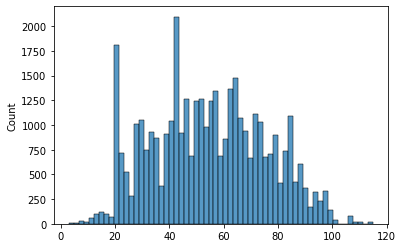

In [107]:
import seaborn as sns
sns.histplot([x.shape[0] for x in X2]);

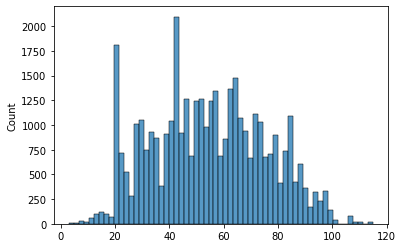

In [108]:
sns.histplot([y.shape[0] for y in y2]);

In [141]:
from keras.preprocessing.sequence import pad_sequences

In [207]:
X3 = []
y3 = []

for xx in X2:
    X3.append(pad_sequences(xx.T, maxlen=80, dtype='float', padding='post', value=-1000., truncating='pre').T)
    
for yy in y2:
    y3.append(pad_sequences(yy.T, maxlen=80, dtype='float', padding='post', value=-1000., truncating='pre').T)

In [208]:
y3[0].shape

(80, 1)

In [224]:
pad_sequences(X[0].T, maxlen=60).T.shape

(60, 4)

In [242]:
X3 = []
y3 = []

for x in X:
    X3.append(pad_sequences(x.T, maxlen=80, dtype='float', padding='post', value=-1000).T)
    
for y in y:
    y3.append(pad_sequences(y.T, maxlen=80, dtype='float', padding='post', value=-1000).T)
    
X3 = np.array(X3)
y3 = np.array(y3)

X3.shape, y3.shape

((2210, 80, 4), (2210, 80, 1))

In [243]:
X_tour_pad = []
y_tour_pad = []

for xx in X_tour:
    X_tour_pad.append(pad_sequences(xx.T, maxlen=80, dtype='float', padding='pre', value=-1000.).T)
    
for yy in y_tour:
    y_tour_pad.append(pad_sequences(yy.T, maxlen=80, dtype='float', padding='pre', value=-1000.).T)
    
X_tour_pad = np.array(X_tour_pad)
y_tour_pad = np.array(y_tour_pad)

X_tour_pad.shape, y_tour_pad.shape

((2210, 80, 4), (2210, 80, 1))

In [244]:
torch.save(X3, 'torch_data/X_tdf_2022.pt')
torch.save(y3, 'torch_data/y_tdf_2022.pt')

torch.save(X_tour_pad, 'torch_data/X_tour_tdf_2022.pt')
torch.save(y_tour_pad, 'torch_data/y_tour_tdf_2022.pt')

In [157]:
X3[0].T.shape

(80, 51)

In [192]:
torch.save(X3, 'torch_data/X_full_scaled.pt')
torch.save(y3, 'torch_data/y_full_scaled.pt')

